# Análisis de Datos Exploratorio
Se levantará el dataset guardado en el notebook de preparación de datos, para poder analizarlo.

In [1]:
import pandas as pd
import os
import json
import ast
import numpy as np
from pyprojroot import here
import sys
sys.path.append(here())
from utils.utils import normalizar_lineas_procesador, separar_valor_um
    

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 


c:\Users\marti\miniconda3\envs\tesis\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:
path = here() / "data"

In [5]:
df = pd.read_csv(path / "datos_laptops_transformed.csv", sep = ";")

## Preview del dataset

In [6]:
df.head(3)

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,Tipo de batería,Marca,Cantidad de núcleos,Resolución de la pantalla,Tamaño de la pantalla,Tipo de pantalla,Tarjeta gráfica,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Cantidad total de puertos USB,Peso,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con cámara web,Con Wi-Fi,Profundidad,Altura,Modos de sonido,Puertos USB,Puertos de video,Ancho,Con USB,Modelo del procesador,Tipo de garantía_x,Tiempo de garantía_x,Tipo de garantía_y,Tiempo de garantía_y
0,MLA1151530200,Notebook Lenovo Ideapad 3 14iil05 Intel Core I...,174556876,89999.00000,89999.00000,['MLA6015'],105,50,gold_special,1,50,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,yes,hasta 14.1,free,[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",[],active,2022-08-11T16:12:19.000Z,me2,True,Ion de litio,Lenovo,2.00000,1920 px x 1080 px,"14 """,LCD,Intel UHD Graphics,No,No,No,Nuevo,IDEAPAD 3,14IIL05,S,Windows,11,Intel,Core i3,8 GB,DDR4,128 GB,3.00000,1.6 kg,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1005G1,Garantía de fábrica,12 meses,Garantía de fábrica,12 meses
1,MLA1149134293,Notebook Lenovo Ideapad 14iil05 Platinum Gray...,335450469,132616.00000,132616.00000,[],75,50,gold_special,1,50,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,yes,hasta 14.1,free,[],"[{'id': 'ALPHANUMERIC_MODEL', 'name': 'Modelo ...",[],active,2022-08-01T19:07:12.000Z,me2,True,Polímero de litio,Lenovo,4.00000,1920 px x 1080 px,"14 """,LCD,Intel UHD Graphics G1,NaN,NaN,NaN,Nuevo,IdeaPad,3,Home,Windows,10,Intel,Core i5,8 GB,DDR4,512 GB,3.00000,1.6 kg,Sí,No,Sí,Sí,Sí,Sí,No,Sí,Sí,241 mm,19.9 mm,"Dolby Audio,Stereo","2.0,3.2",HDMI,327.1 mm,Sí,1035G1,Garantía del vendedor,6 meses,Garantía del vendedor,6 meses
2,MLA1135443731,"Notebook Exo Smart L33e Gris 14 , Intel Celero...",25704919,59999.00000,59999.00000,"['MLA8258', 'MLA9166', 'MLA6015']",482,250,gold_special,1,250,"[{'id': 'INVOICE', 'name': 'Facturación', 'val...",new,yes,hasta 14.1,free,[],"[{'id': 'ASPECT_RATIO', 'name': 'Relación de a...",[],active,2022-05-04T15:42:38.000Z,me2,True,NaN,EXO,2.00000,1366 px x 768 px,"14 """,LED,Intel UHD Graphics 600,NaN,NaN,NaN,Nuevo,Smart,L33E,Home,Windows,10,Intel,Celeron,4 GB,DDR4,64 GB,2.00000,1350 g,Sí,NaN,Sí,Sí,Sí,Sí,NaN,Sí,Sí,216 mm,22.2 mm,NaN,"2.0,3.0",Mini-HDMI,327 mm,Sí,N4020,Garantía de fábrica,12 meses,Garantía de fábrica,12 meses


In [7]:
df.shape

(11574, 67)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11574 entries, 0 to 11573
Data columns (total 67 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                11574 non-null  object 
 1   title                             11574 non-null  object 
 2   seller_id                         11574 non-null  int64  
 3   price                             11574 non-null  float64
 4   base_price                        11574 non-null  float64
 5   deal_ids                          11574 non-null  object 
 6   initial_quantity                  11574 non-null  int64  
 7   sold_quantity                     11574 non-null  int64  
 8   listing_type_id                   11574 non-null  object 
 9   available_quantity                11574 non-null  int64  
 10  sold_quantity.1                   11574 non-null  int64  
 11  sale_terms                        11574 non-null  object 
 12  cond

In [9]:
df.shape

(11574, 67)

Haremos un analisis exploratorio con los siguientes campos para poder determinar cuales usar para las categorias:
- precio
- marca
- resolucion
- es gamer
- velocidad max del procesador
- marca
- linea del procesador
- memoria ram
- capacidad del ssd
- cuotas
- tamaño de la pantalla  
- costo de envío
- peso

### Precio

In [10]:
df.price.describe()

count     11574.00000
mean     206471.81427
std      125035.45137
min        4200.00000
25%      148799.00000
50%      189999.00000
75%      232499.00000
max     2701999.00000
Name: price, dtype: float64

In [11]:
df = df[df.price > 50000]

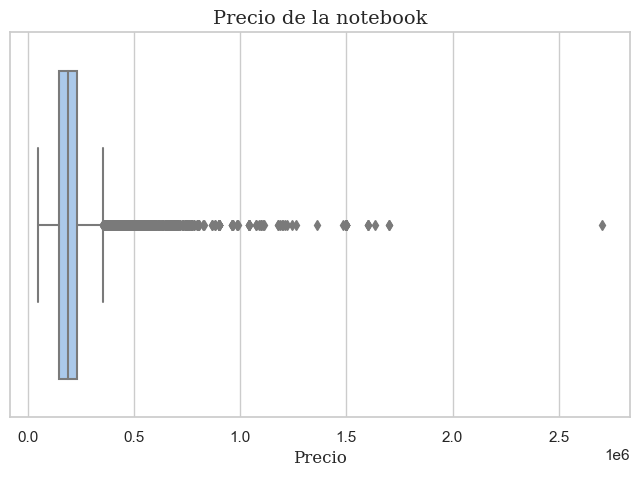

In [12]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax = sns.boxplot(x="price", data=df)
ax.set_title("Precio de la notebook", size=14, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

In [13]:
df[df.price > 2500000]

,id,title,seller_id,price,base_price,deal_ids,initial_quantity,sold_quantity,listing_type_id,available_quantity,sold_quantity.1,sale_terms,condition,installment,display_size,shipping_cost,descriptions,attributes,warnings,status,date_created,shipping.mode,shipping.free_shipping,Tipo de batería,Marca,Cantidad de núcleos,Resolución de la pantalla,Tamaño de la pantalla,Tipo de pantalla,Tarjeta gráfica,Es 2 en 1,Es gamer,Es ultrabook,Condición del ítem,Línea,Modelo,Edición del sistema operativo,Nombre del sistema operativo,Versión del sistema operativo,Marca del procesador,Línea del procesador,Memoria RAM,Tipo de memoria RAM,Capacidad del SSD,Cantidad total de puertos USB,Peso,Con Bluetooth,Con puerto ethernet,Con HDMI,Con salida para auriculares,Con lector de tarjeta de memoria,Con micrófono,Con pantalla táctil,Con cámara web,Con Wi-Fi,Profundidad,Altura,Modos de sonido,Puertos USB,Puertos de video,Ancho,Con USB,Modelo del procesador,Tipo de garantía_x,Tiempo de garantía_x,Tipo de garantía_y,Tiempo de garantía_y
11451,MLA1123217115,Apple Macbook Pro 16 2021 M1 Pro Ssd4tb 32gb S...,245722648,2701999.00000,2701999.00000,[],1,0,gold_pro,1,0,"[{'id': 'WARRANTY_TYPE', 'name': 'Tipo de gara...",new,no_interest,entre 14.1 y 16.9,free,[],"[{'id': 'BATTERY_TYPE', 'name': 'Tipo de bater...",[],active,2022-02-11T19:25:21.000Z,me2,True,Polímero de litio,Apple,10.00000,3456 px x 2234 px,"16.2 """,NaN,Apple GPU,No,No,NaN,Nuevo,MacBook Pro,"Macbook Pro 16""",NaN,macOS,Monterey,Apple,M1 Pro,32 GB,NaN,4 TB,NaN,2.15 kg,NaN,NaN,Sí,NaN,NaN,NaN,No,NaN,NaN,24.81 cm,NaN,NaN,NaN,NaN,35.57 cm,Sí,NaN,Garantía del vendedor,6 meses,Garantía del vendedor,6 meses


Tiene sentido esta computadora que es una MAC de alto nivel, por lo tanto no la eliminaremos del dataframe.

### Marca  
Como existen muchas marcas se procede a agrupar aquellas que aparezcan menos de 100 veces, bajo el nombre "Otros". Se entiende que las marcas más populares estan dentro de las que tienen mas de 100 y que no sería tan relevante dejar el nombre de una marca que aparece menos de 100 veces.

In [14]:
marcas = df.Marca.value_counts().to_frame()
marcas["condicion"] = marcas.index
marcas.loc[marcas["Marca"] < 100, "condicion"] = "Otro"
marcas = marcas.rename_axis('Marca_Original').reset_index()
marcas.columns = ["Marca_Original", "Cantidad", "Marca_Nueva"]
marcas.tail()

del marcas["Cantidad"]

In [15]:
df = df.merge(marcas,
         how = "left",
         left_on = "Marca",
         right_on = "Marca_Original")


In [16]:
del df["Marca_Original"], df["Marca"]
df.rename(columns = {"Marca_Nueva" : "Marca"}, inplace = True)

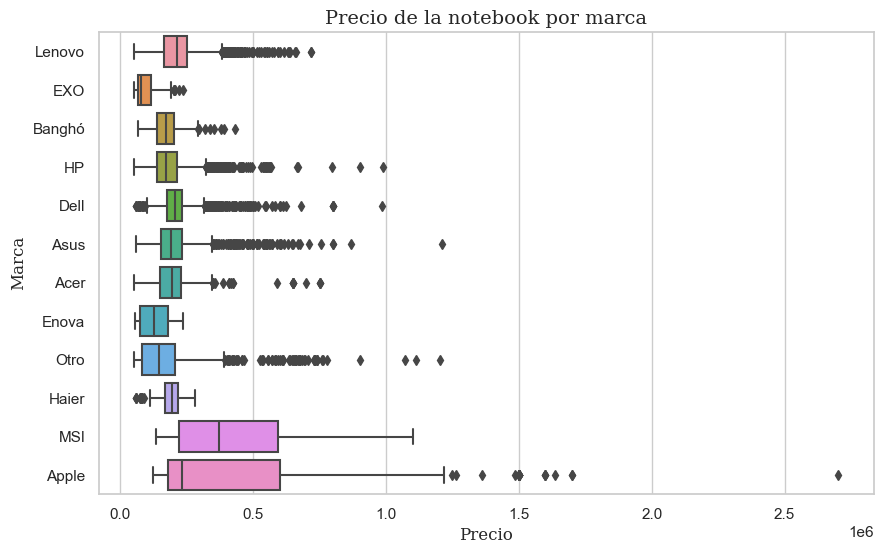

In [17]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(10,6))
ax = sns.boxplot(x="price", data=df, y = "Marca")  
ax.set_title("Precio de la notebook por marca", size=14, family='serif') 
plt.ylabel('Marca', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

<Figure size 800x400 with 0 Axes>

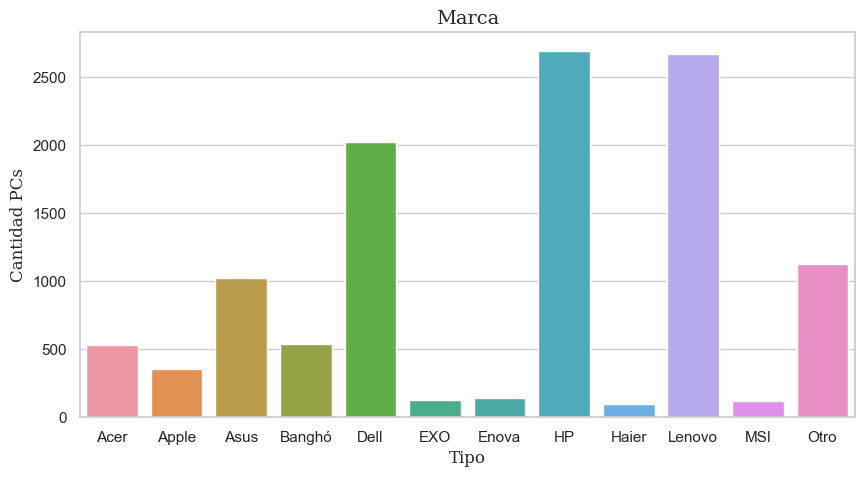

In [18]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Marca", y = "total", data=df.groupby("Marca").size().reset_index(name="total"))
ax.set_title("Marca", size=14, family='serif') 
plt.xlabel("Tipo", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

## Procesador

In [19]:
df = df.rename(columns= {"Línea del procesador" : "linea_procesador"})
df.linea_procesador.isna().sum()

1812

In [20]:
df = normalizar_lineas_procesador(df, "linea_procesador")
df.linea_procesador.isna().sum()

1812

In [21]:
df = df.rename(columns= {"Modelo del procesador" : "modelo_procesador"})
df.modelo_procesador.isna().sum()

7788

In [22]:
df = normalizar_lineas_procesador(df, "modelo_procesador")
df.modelo_procesador.isna().sum()

7788

In [23]:
cm1 = (df.modelo_procesador == "M1")
cotro = (df.linea_procesador == "Otro")

df.loc[cm1 & cotro, "linea_procesador"] = "M1"

In [24]:
df.linea_procesador.value_counts()

Core i5    2767
Core i3    1876
Core i7    1530
Ryzen 5    1008
Celeron     933
Ryzen 7     315
Otro        314
Ryzen 3     283
Athlon      278
Pentium     217
AMD A6       79
M1           50
Name: linea_procesador, dtype: int64

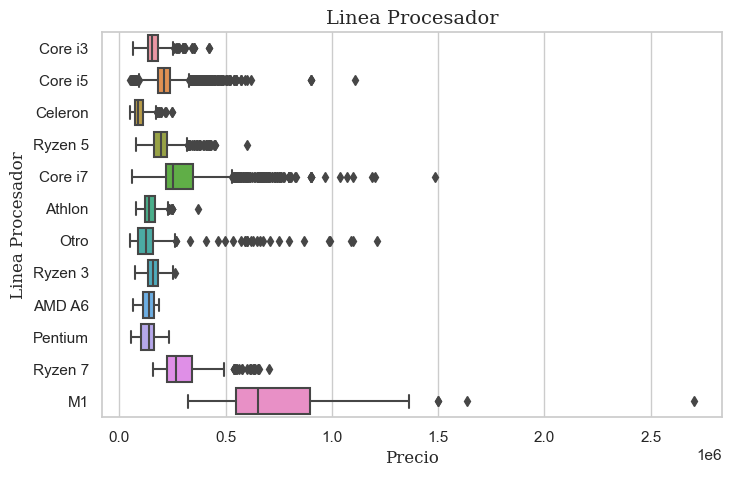

In [25]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))
ax = sns.boxplot(x="price", data=df, y = "linea_procesador")
ax.set_title("Linea Procesador", size=14, family='serif') 
plt.ylabel('Linea Procesador', size=12, family='serif')  
plt.xlabel('Precio', size=12, family='serif')  
plt.show()

### RAM

In [26]:
df = separar_valor_um(df = df,
                    colname = "Memoria RAM", 
                    res_val = 'Capacidad RAM', 
                    res_um = 'Medida_RAM',
                    cambio = {"mb" : 1000,
                              "kb" : 1000000},
                    new_um = "GB")

<Figure size 800x400 with 0 Axes>

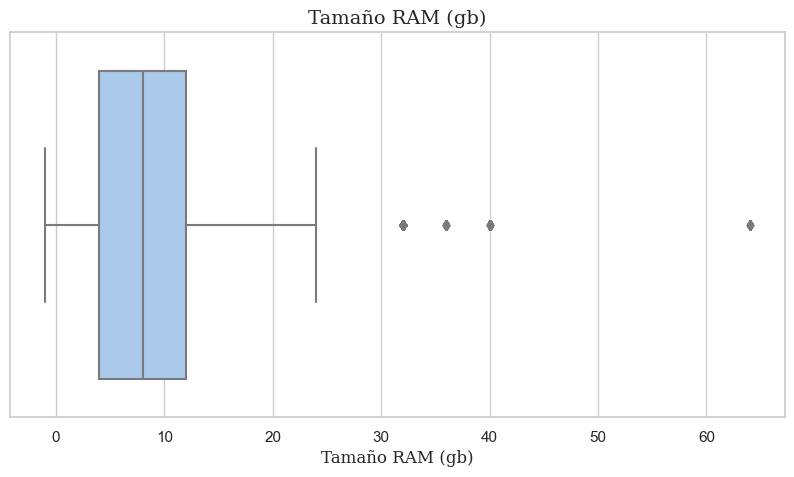

In [27]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Capacidad RAM", data=df)
ax.set_title("Tamaño RAM (gb)", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.show()

In [28]:
df = df[df["Capacidad RAM"] < 129]

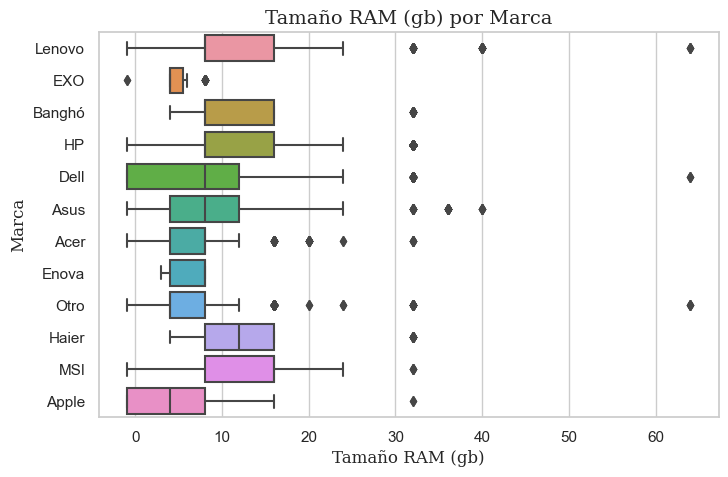

In [29]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="Capacidad RAM", data=df, y = "Marca")
ax.set_title("Tamaño RAM (gb) por Marca", size=14, family='serif') 
plt.xlabel('Tamaño RAM (gb)', size=12, family='serif')  
plt.ylabel('Marca', size=12, family='serif')  
plt.show()

### Peso

In [30]:
df = separar_valor_um(df = df,
                    colname = "Peso", 
                    res_val = 'Valor_Peso', 
                    res_um = 'Medida_Peso',
                    cambio = {"g" : 1000,
                              "lb" : 2.205},
                    new_um = "kg")

In [31]:
c_peso_ok = (df["Valor_Peso"] < 5) & (df["Valor_Peso"] > 0)
df.loc[~c_peso_ok, "Valor_Peso"] = np.NaN
df.loc[~c_peso_ok, "Medida_Peso"] = np.NaN

<Figure size 800x400 with 0 Axes>

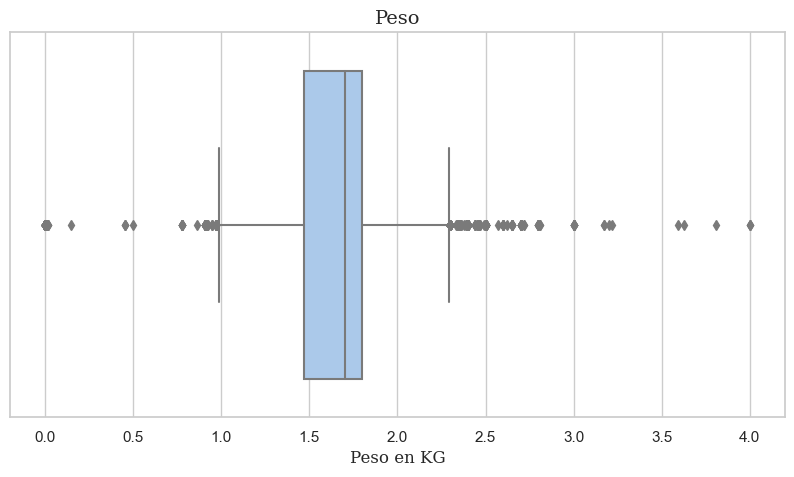

In [32]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Valor_Peso", data=df)
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso en KG', size=12, family='serif')  
plt.show()

### Tamaño de la pantalla


In [33]:
df["Tamaño de la pantalla"].value_counts().to_frame().head()

,Tamaño de la pantalla
"15.6 """,5054
"14 """,3612
15.6 in,561
14 in,500
13.3 in,482


In [34]:
df["Tamaño de la pantalla"] = df["Tamaño de la pantalla"].str.replace('"', "pulgadas")
df["Tamaño de la pantalla"] = df["Tamaño de la pantalla"].str.replace('in', "pulgadas")


In [35]:
df = separar_valor_um(df = df,
                    colname = "Tamaño de la pantalla", 
                    res_val = 'Valor_Screen', 
                    res_um = 'Medida_Screen',
                    cambio = {"cm" : 2.54,
                              "mm" : 25.4},
                    new_um = "pulgadas")

In [36]:
df = df[df.Valor_Screen > 8]

<Figure size 800x400 with 0 Axes>

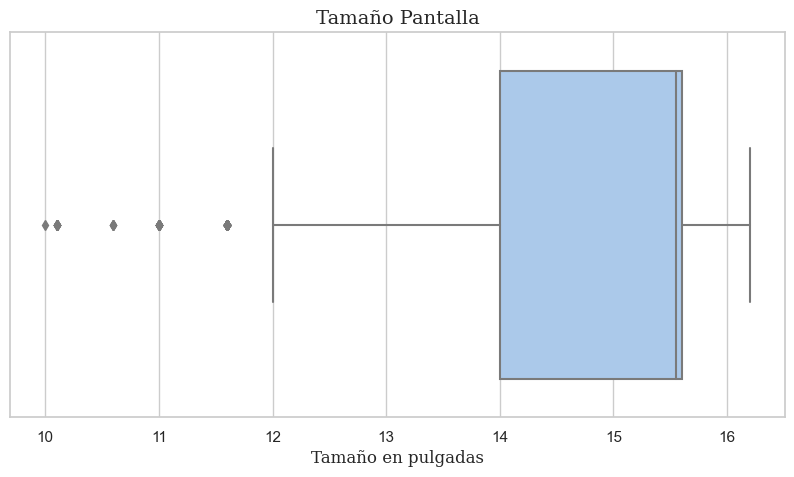

In [37]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Valor_Screen", data=df)
ax.set_title("Tamaño Pantalla", size=14, family='serif') 
plt.xlabel("Tamaño en pulgadas", size=12, family='serif')  
plt.show()

### Cuotas

In [38]:
df.installment.value_counts()

yes            7844
no_interest    3612
Name: installment, dtype: int64

In [39]:
df.groupby("installment").size().reset_index(name="total")

,installment,total
0,no_interest,3612
1,yes,7844


<Figure size 800x400 with 0 Axes>

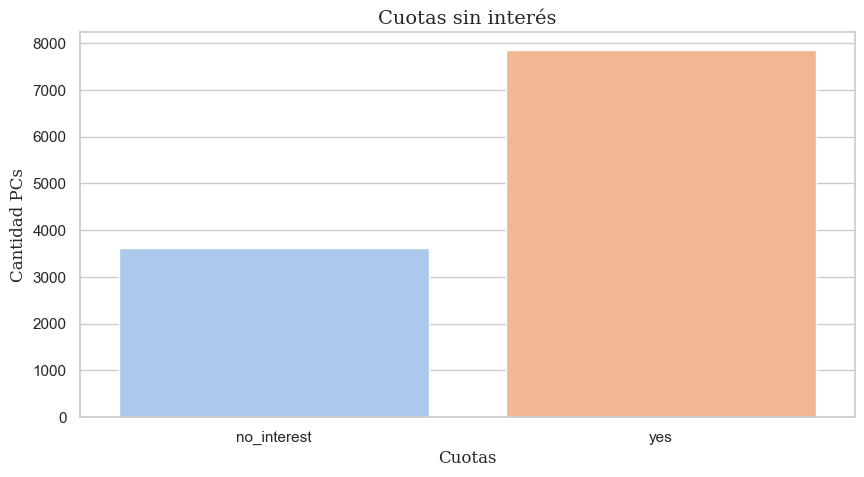

In [40]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="installment", y = "total", data=df.groupby("installment").size().reset_index(name="total"))
ax.set_title("Cuotas sin interés", size=14, family='serif') 
plt.xlabel("Cuotas", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Cantidad de nucleos

In [41]:
df = df[df["Cantidad de núcleos"]<50]

<Figure size 800x400 with 0 Axes>

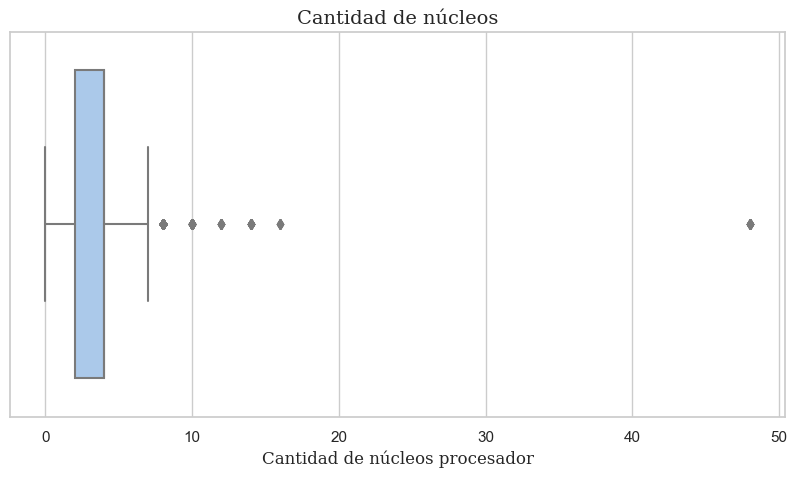

In [42]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Cantidad de núcleos", data=df[df["Cantidad de núcleos"]<50])
ax.set_title("Cantidad de núcleos", size=14, family='serif') 
plt.xlabel("Cantidad de núcleos procesador", size=12, family='serif')  
plt.show()

In [43]:
df["Cantidad de núcleos"].describe()

count   8406.00000
mean       3.70533
std        2.43251
min        0.00000
25%        2.00000
50%        4.00000
75%        4.00000
max       48.00000
Name: Cantidad de núcleos, dtype: float64

### Tarjeta Gráfica

In [44]:
df["Tarjeta gráfica"].isna().sum()

1020

In [45]:
df["Tarjeta gráfica"] = df["Tarjeta gráfica"].str.lower()

In [46]:
lista_dedi = ["nvidia geforce gtx 1650", "gráficos amd radeon™"]

c_nvidia = df["Tarjeta gráfica"].str.contains("nvidia", na = False)
c_dedi = df["Tarjeta gráfica"].isin(lista_dedi)

df["tipo_tarjeta_gráfica"] = "integrada"
df.loc[(c_nvidia | c_dedi), "tipo_tarjeta_gráfica"] = "dedicada"



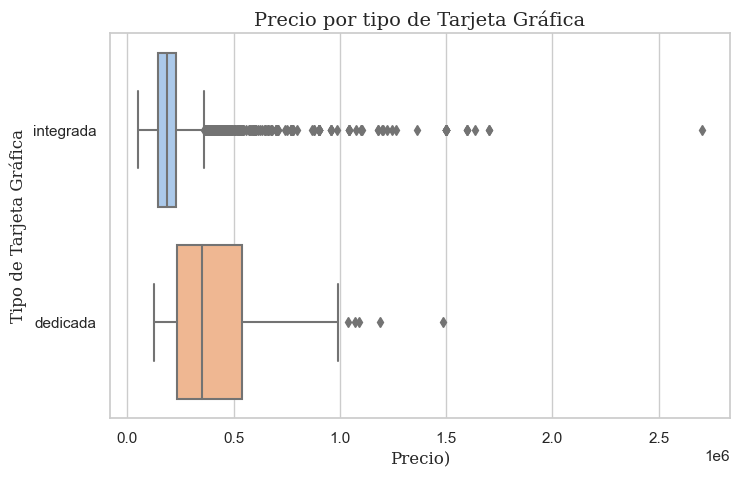

In [47]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df, y = "tipo_tarjeta_gráfica")
ax.set_title("Precio por tipo de Tarjeta Gráfica", size=14, family='serif') 
plt.xlabel('Precio)', size=12, family='serif')  
plt.ylabel('Tipo de Tarjeta Gráfica', size=12, family='serif')  
plt.show()

<Figure size 800x400 with 0 Axes>

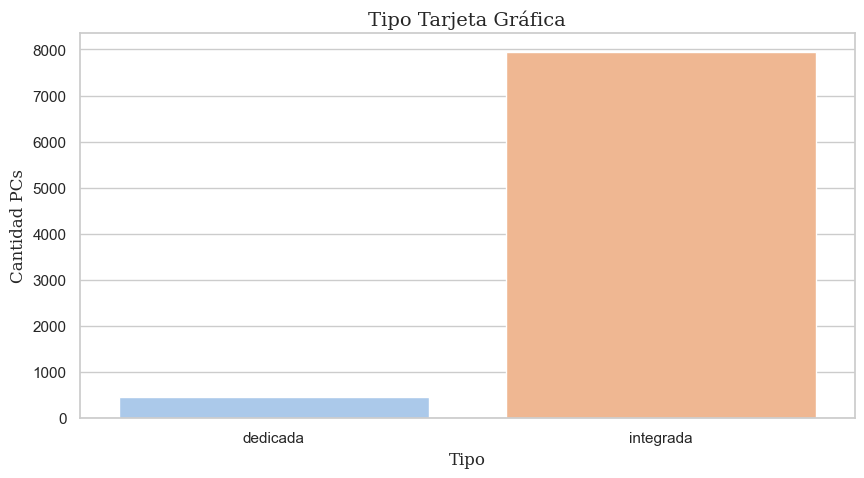

In [48]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="tipo_tarjeta_gráfica", y = "total", data=df.groupby("tipo_tarjeta_gráfica").size().reset_index(name="total"))
ax.set_title("Tipo Tarjeta Gráfica", size=14, family='serif') 
plt.xlabel("Tipo", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Gamer

In [49]:
df["Es gamer"].value_counts()

No    5811
Sí    1955
Name: Es gamer, dtype: int64

<Figure size 800x400 with 0 Axes>

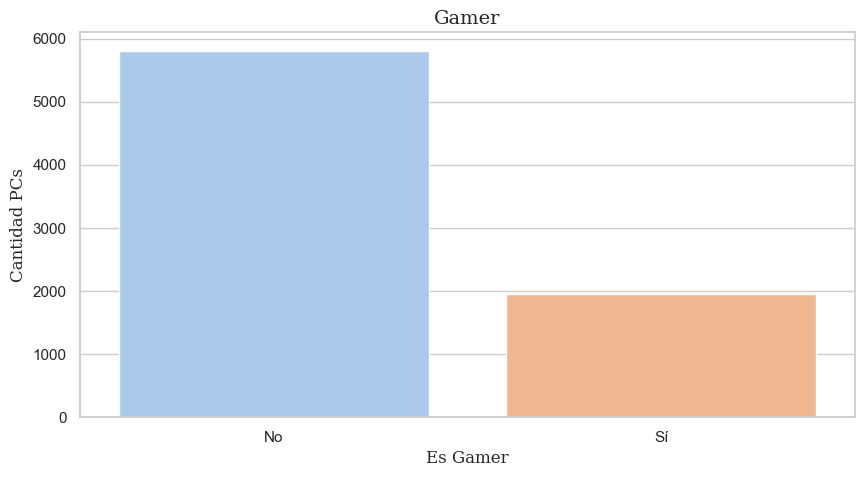

In [50]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es gamer", y = "total", data=df.groupby("Es gamer").size().reset_index(name="total"))
ax.set_title("Gamer", size=14, family='serif') 
plt.xlabel("Es Gamer", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Es 2 en 1


In [51]:
df["Es 2 en 1"].value_counts()

No    7342
Sí     350
Name: Es 2 en 1, dtype: int64

<Figure size 800x400 with 0 Axes>

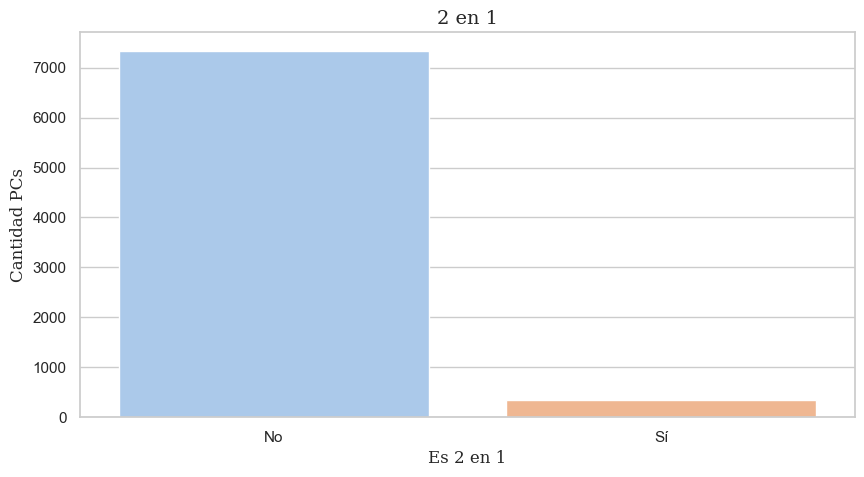

In [52]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es 2 en 1", y = "total", data=df.groupby("Es 2 en 1").size().reset_index(name="total"))
ax.set_title("2 en 1", size=14, family='serif') 
plt.xlabel("Es 2 en 1", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

###  Es ultrabook

In [53]:
df["Es ultrabook"].value_counts()

No    4939
Sí    2660
Name: Es ultrabook, dtype: int64

<Figure size 800x400 with 0 Axes>

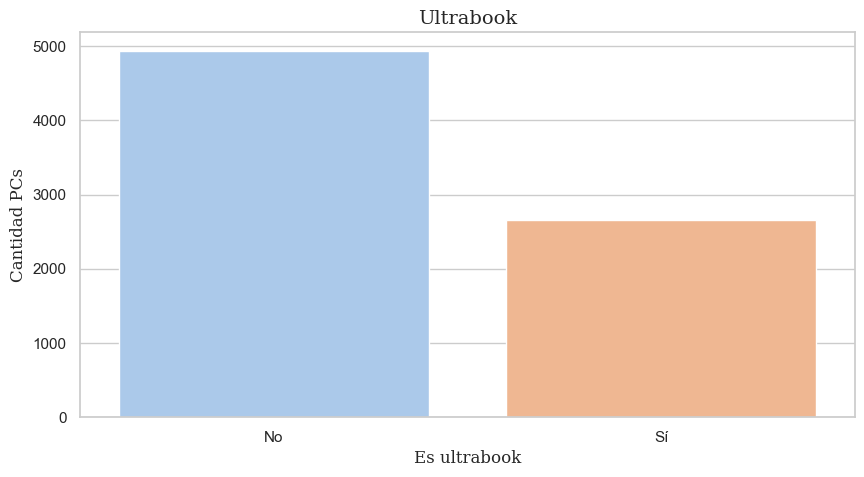

In [54]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Es ultrabook", y = "total", data=df.groupby("Es ultrabook").size().reset_index(name="total"))
ax.set_title("Ultrabook", size=14, family='serif') 
plt.xlabel("Es ultrabook", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

### Capacidad del disco Sólido

In [55]:
df = separar_valor_um(df = df,
                    colname = "Capacidad del SSD", 
                    res_val = 'Capacidad_SSD', 
                    res_um = 'Medida_SSD',
                    cambio = {"mb" : 1000,
                              "kb" : 1000000},
                    new_um = "GB")

In [56]:
df = df[df["Capacidad_SSD"] <= 4000]

<Figure size 800x400 with 0 Axes>

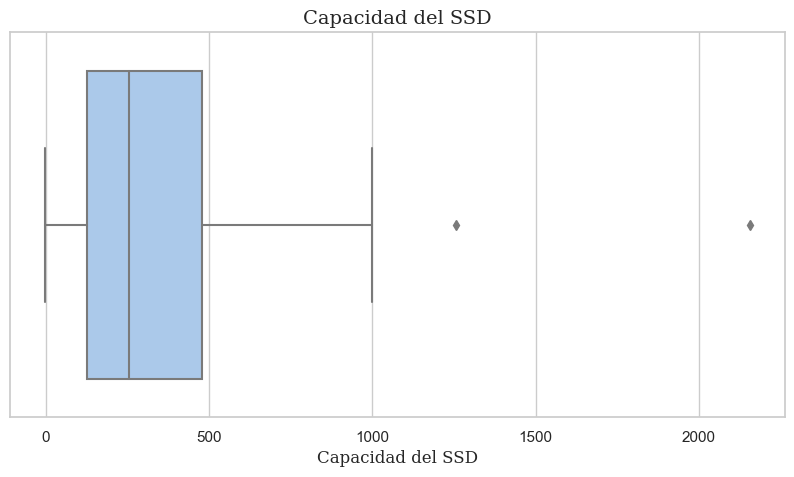

In [57]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.boxplot(x="Capacidad_SSD", data=df[df["Capacidad_SSD"] <= 4000])
ax.set_title("Capacidad del SSD", size=14, family='serif') 
plt.xlabel("Capacidad del SSD", size=12, family='serif')  
plt.show()

### Es touchscreen

In [58]:
df["Con pantalla táctil"].value_counts()

No    7278
Sí     560
Name: Con pantalla táctil, dtype: int64

<Figure size 800x400 with 0 Axes>

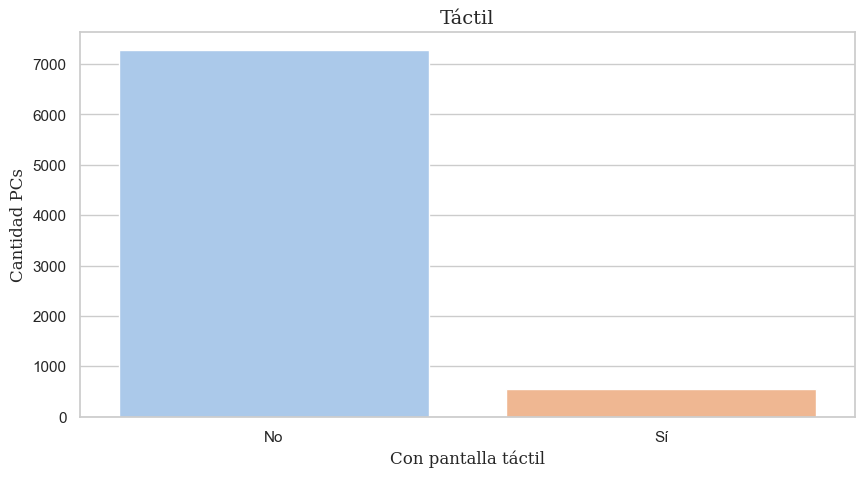

In [59]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="Con pantalla táctil", y = "total", data=df.groupby("Con pantalla táctil").size().reset_index(name="total"))
ax.set_title("Táctil", size=14, family='serif') 
plt.xlabel("Con pantalla táctil", size=12, family='serif')  
plt.ylabel("Cantidad PCs", size=12, family='serif')  
plt.show()

In [60]:
df.columns

Index(['id', 'title', 'seller_id', 'price', 'base_price', 'deal_ids',
       'initial_quantity', 'sold_quantity', 'listing_type_id',
       'available_quantity', 'sold_quantity.1', 'sale_terms', 'condition',
       'installment', 'display_size', 'shipping_cost', 'descriptions',
       'attributes', 'warnings', 'status', 'date_created', 'shipping.mode',
       'shipping.free_shipping', 'Tipo de batería', 'Cantidad de núcleos',
       'Resolución de la pantalla', 'Tamaño de la pantalla',
       'Tipo de pantalla', 'Tarjeta gráfica', 'Es 2 en 1', 'Es gamer',
       'Es ultrabook', 'Condición del ítem', 'Línea', 'Modelo',
       'Edición del sistema operativo', 'Nombre del sistema operativo',
       'Versión del sistema operativo', 'Marca del procesador', 'Memoria RAM',
       'Tipo de memoria RAM', 'Capacidad del SSD',
       'Cantidad total de puertos USB', 'Peso', 'Con Bluetooth',
       'Con puerto ethernet', 'Con HDMI', 'Con salida para auriculares',
       'Con lector de tarjeta de m

In [61]:
df = df[["id", "title", "price", "base_price", "initial_quantity", "sold_quantity", "available_quantity", "installment", 
        "shipping_cost", "date_created", "Cantidad de núcleos",  "Tarjeta gráfica", "tipo_tarjeta_gráfica", "Es 2 en 1", "Es gamer",
        "Es ultrabook", "Marca del procesador", "Con pantalla táctil",  "Marca", "linea_procesador", 'Capacidad RAM', 'Valor_Peso', 
        'Valor_Screen', 'tipo_tarjeta_gráfica', 'Capacidad_SSD']]

### Manejo de nulos

In [62]:
df.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8404 entries, 0 to 11461
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    8404 non-null   object 
 1   title                 8404 non-null   object 
 2   price                 8404 non-null   float64
 3   base_price            8404 non-null   float64
 4   initial_quantity      8404 non-null   int64  
 5   sold_quantity         8404 non-null   int64  
 6   available_quantity    8404 non-null   int64  
 7   installment           8404 non-null   object 
 8   shipping_cost         8404 non-null   object 
 9   date_created          8404 non-null   object 
 10  Cantidad de núcleos   8404 non-null   float64
 11  Tarjeta gráfica       7384 non-null   object 
 12  tipo_tarjeta_gráfica  8404 non-null   object 
 13  Es 2 en 1             7690 non-null   object 
 14  Es gamer              7764 non-null   object 
 15  Es ultrabook        

In [63]:
df["nulls"] = len(df.columns) - df.apply(lambda x: x.count(), axis=1)

In [64]:
df.nulls.describe()

count   8404.00000
mean       0.49108
std        1.06004
min        0.00000
25%        0.00000
50%        0.00000
75%        1.00000
max        6.00000
Name: nulls, dtype: float64

<Figure size 800x400 with 0 Axes>

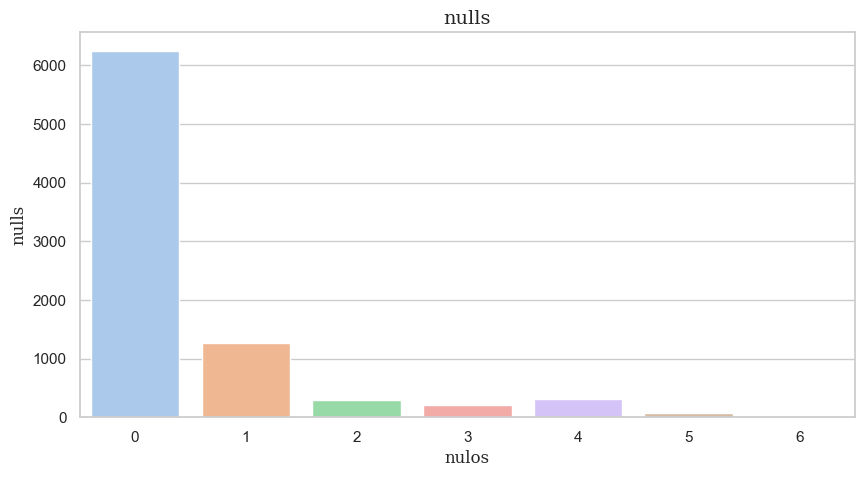

In [65]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.barplot(x="nulls", y = "total", data=df.groupby("nulls").size().reset_index(name="total"))
ax.set_title("nulls", size=14, family='serif') 
plt.xlabel("nulos", size=12, family='serif')  
plt.ylabel("nulls", size=12, family='serif')  
plt.show()

### Filtramos aquellas filas que tengan mas de 2 nulos

In [66]:
df.shape

(8404, 26)

In [67]:
df = df[df["nulls"] <3]

In [68]:
df.shape

(7807, 26)

### Normalizamos nombres de variables

In [69]:
import janitor

In [70]:
df = df.clean_names()

In [71]:
df = df[df["capacidad_ram"]>0]
df = df[df["valor_peso"]>0]
df = df[df["valor_screen"]>0]	
df = df[df["capacidad_ssd"]>0]	

### Imputación de nulos

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6981 entries, 0 to 11459
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6981 non-null   object 
 1   title                 6981 non-null   object 
 2   price                 6981 non-null   float64
 3   base_price            6981 non-null   float64
 4   initial_quantity      6981 non-null   int64  
 5   sold_quantity         6981 non-null   int64  
 6   available_quantity    6981 non-null   int64  
 7   installment           6981 non-null   object 
 8   shipping_cost         6981 non-null   object 
 9   date_created          6981 non-null   object 
 10  cantidad_de_nucleos   6981 non-null   float64
 11  tarjeta_grafica       6156 non-null   object 
 12  tipo_tarjeta_grafica  6981 non-null   object 
 13  es_2_en_1             6848 non-null   object 
 14  es_gamer              6904 non-null   object 
 15  es_ultrabook        

Aquellas columnas que son categoricas (true/false) las llenamos asumiendo que lo nulo es falso.

In [73]:
c_gamer = df.es_gamer.isna()
c_ultra = df.es_ultrabook.isna()
c_21 = df.es_2_en_1.isna()
c_tacil = df.con_pantalla_tactil.isna()

df.loc[c_gamer, "es_gamer"] = "No"
df.loc[c_ultra, "es_ultrabook"] = "No"
df.loc[c_21, "es_2_en_1"] = "No"
df.loc[c_tacil, "con_pantalla_tactil"] = "No"

Las categoricas las reemplazamos por la moda y las numericas por el promedio.

In [74]:
import statistics as stat

In [75]:
c_mp = df.marca_del_procesador.isna()
c_m = df.marca.isna()
c_lp = df.linea_procesador.isna()
c_vp = df.valor_peso.isna()
c_tg = df.tarjeta_grafica.isna()


df.loc[c_mp, "marca_del_procesador"] = stat.mode(df.marca_del_procesador)
df.loc[c_m, "marca"] = stat.mode(df.marca)
df.loc[c_lp, "linea_procesador"] = stat.mode(df.linea_procesador)
df.loc[c_vp, "valor_peso"] = df.valor_peso.median()
df.loc[c_tg, "tarjeta_grafica"] = stat.mode(df.tarjeta_grafica)


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6981 entries, 0 to 11459
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    6981 non-null   object 
 1   title                 6981 non-null   object 
 2   price                 6981 non-null   float64
 3   base_price            6981 non-null   float64
 4   initial_quantity      6981 non-null   int64  
 5   sold_quantity         6981 non-null   int64  
 6   available_quantity    6981 non-null   int64  
 7   installment           6981 non-null   object 
 8   shipping_cost         6981 non-null   object 
 9   date_created          6981 non-null   object 
 10  cantidad_de_nucleos   6981 non-null   float64
 11  tarjeta_grafica       6981 non-null   object 
 12  tipo_tarjeta_grafica  6981 non-null   object 
 13  es_2_en_1             6981 non-null   object 
 14  es_gamer              6981 non-null   object 
 15  es_ultrabook        

In [77]:
del df["nulls"]

In [78]:
df._get_numeric_data().head()

,price,base_price,initial_quantity,sold_quantity,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd
0,89999.00000,89999.00000,105,50,1,2.00000,8.00000,1.60000,14.00000,128.00000
3,71999.00000,71999.00000,9979,500,5000,2.00000,4.00000,1.30000,14.00000,120.00000
4,139999.00000,139999.00000,339,250,1,4.00000,8.00000,1.46000,14.00000,256.00000
6,79999.00000,79999.00000,398,50,250,2.00000,4.00000,1.47000,14.00000,128.00000
9,71499.00000,71499.00000,44,25,1,2.00000,4.00000,1.20000,10.10000,64.00000


In [79]:

df["ratio_sold"] = df.sold_quantity / (df.sold_quantity + df.available_quantity )

del df["base_price"], df["sold_quantity"], df["initial_quantity"]

In [80]:
df._get_numeric_data().head()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
0,89999.00000,1,2.00000,8.00000,1.60000,14.00000,128.00000,0.98039
3,71999.00000,5000,2.00000,4.00000,1.30000,14.00000,120.00000,0.09091
4,139999.00000,1,4.00000,8.00000,1.46000,14.00000,256.00000,0.99602
6,79999.00000,250,2.00000,4.00000,1.47000,14.00000,128.00000,0.16667
9,71499.00000,1,2.00000,4.00000,1.20000,10.10000,64.00000,0.96154


In [81]:
df_n = df._get_numeric_data()
columns = df_n.columns

In [82]:
df.to_csv(path / "datos_laptops_transformed_cleaned.csv", index = False, sep = ";")

## K Means

In [83]:
from sklearn.cluster import KMeans
import numpy as np

In [84]:
normalized_df=(df_n-df_n.mean())/df.std()


C:\Users\marti\AppData\Local\Temp\ipykernel_3660\2328738380.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  normalized_df=(df_n-df_n.mean())/df.std()


In [85]:
normalized_df.head()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
0,-1.05039,-0.37762,-0.70395,-0.48744,-0.20179,-1.04556,-0.89720,2.51055
3,-1.19913,2.84995,-0.70395,-1.00943,-1.22902,-1.04556,-0.94084,-0.28196
4,-0.63723,-0.37762,0.08448,-0.48744,-0.68116,-1.04556,-0.19900,2.55960
6,-1.13302,-0.21685,-0.70395,-1.00943,-0.64692,-1.04556,-0.89720,-0.04412
9,-1.20326,-0.37762,-0.70395,-1.00943,-1.57143,-5.52272,-1.24630,2.45135


In [86]:
normalized_df.describe()

,price,available_quantity,cantidad_de_nucleos,capacidad_ram,valor_peso,valor_screen,capacidad_ssd,ratio_sold
count,6981.00000,6981.00000,6981.00000,6981.00000,6981.00000,6981.00000,6981.00000,6981.00000
mean,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000
std,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000,1.00000
min,-1.37265,-0.37762,-1.49237,-1.27043,-5.67691,-5.52272,-1.59260,-0.56737
25%,-0.54122,-0.37762,-0.70395,-0.48744,-0.64692,-1.04556,-0.28628,-0.56737
50%,-0.17779,-0.37762,0.08448,-0.48744,0.14062,0.79123,-0.19900,-0.56737
75%,0.20397,-0.34598,0.08448,0.55653,0.48303,0.79123,1.02284,0.47912
max,20.53320,2.84995,17.42981,6.82040,6.61215,1.48002,10.16483,2.56584


In [87]:
normalized_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6981 entries, 0 to 11459
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   price                6981 non-null   float64
 1   available_quantity   6981 non-null   float64
 2   cantidad_de_nucleos  6981 non-null   float64
 3   capacidad_ram        6981 non-null   float64
 4   valor_peso           6981 non-null   float64
 5   valor_screen         6981 non-null   float64
 6   capacidad_ssd        6981 non-null   float64
 7   ratio_sold           6981 non-null   float64
dtypes: float64(8)
memory usage: 490.9 KB


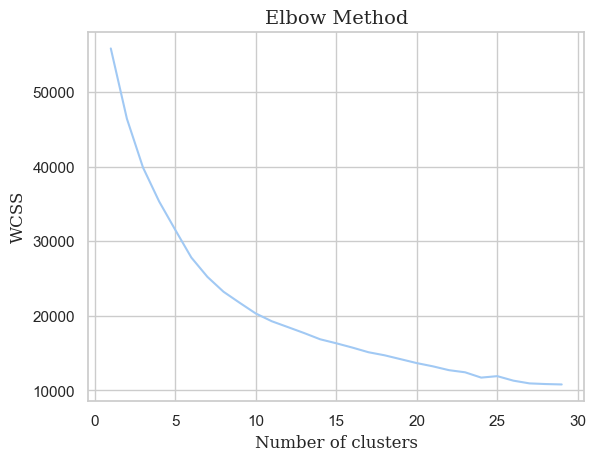

In [88]:
wcss = []
limit = 30
for i in range(1, limit):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=17)
    kmeans.fit(normalized_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, limit), wcss)
plt.title('Elbow Method', size=14, family='serif')
plt.xlabel('Number of clusters', size=12, family='serif')  
plt.ylabel('WCSS', size=12, family='serif')  
plt.show()

In [89]:
kmeans = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(normalized_df)

df_n["grupo"] = pred_y

<Figure size 800x400 with 0 Axes>

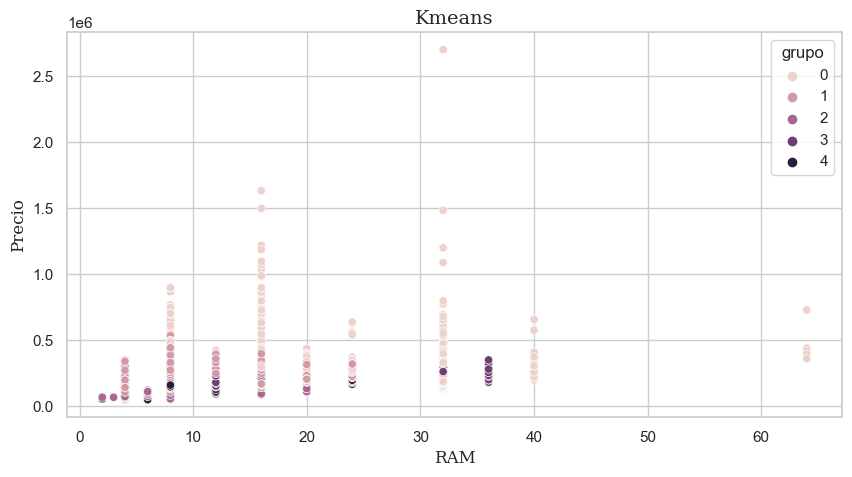

In [90]:
#sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="capacidad_ram", y = "price", hue = "grupo", data=df_n)
ax.set_title("Kmeans", size=14, family='serif') 
plt.xlabel("RAM", size=12, family='serif')  
plt.ylabel("Precio", size=12, family='serif')  
plt.show()

In [91]:
df_n["grupo"] = df_n["grupo"].astype(str)

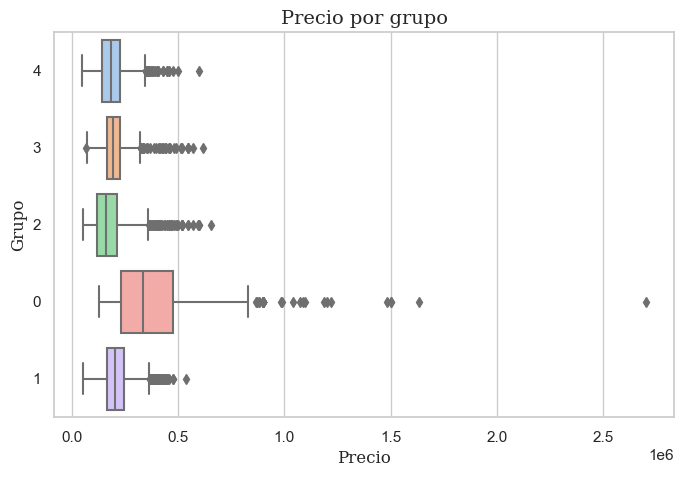

In [92]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df_n, y = "grupo")
ax.set_title("Precio por grupo", size=14, family='serif') 
plt.xlabel('Precio', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

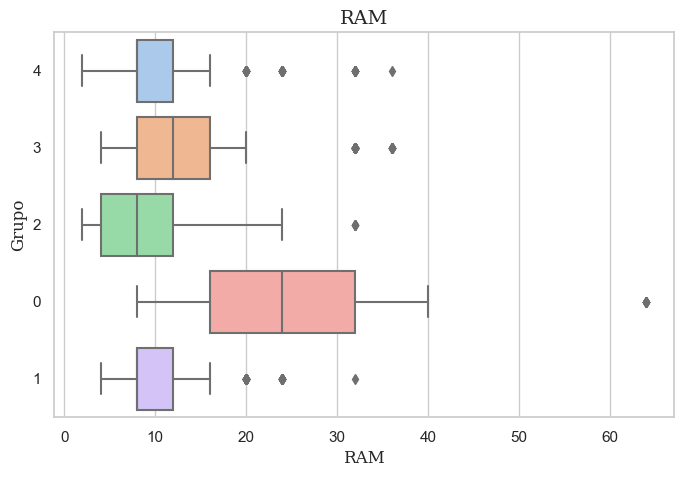

In [93]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ram", data=df_n, y = "grupo")
ax.set_title("RAM", size=14, family='serif') 
plt.xlabel('RAM', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

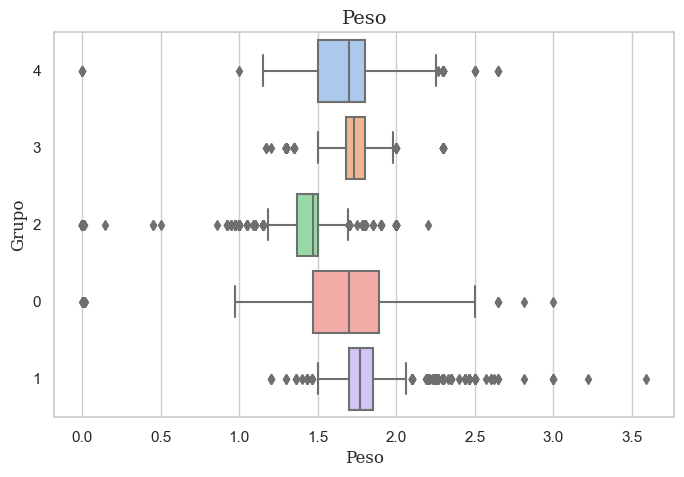

In [94]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="valor_peso", data=df_n, y = "grupo")
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

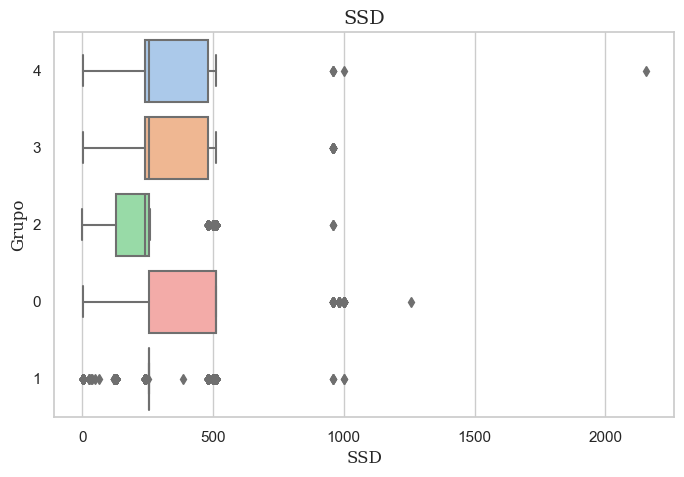

In [95]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ssd", data=df_n, y = "grupo")
ax.set_title("SSD", size=14, family='serif') 
plt.xlabel('SSD', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

## DBSCAN

In [96]:
from sklearn.neighbors import NearestNeighbors # importing the library
neighb = NearestNeighbors(n_neighbors=2) # creating an object of the NearestNeighbors class
nbrs=neighb.fit(normalized_df) # fitting the data to the object
distances,indices=nbrs.kneighbors(normalized_df)

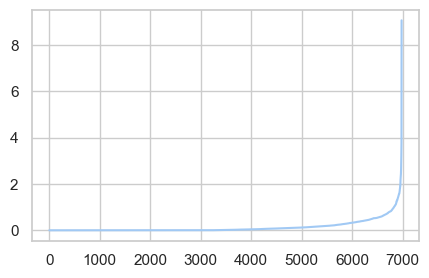

In [97]:
# Sort and plot the distances results
distances = np.sort(distances, axis = 0) # sorting the distances
distances = distances[:, 1] # taking the second column of the sorted distances
plt.rcParams['figure.figsize'] = (5,3) # setting the figure size
plt.plot(distances) # plotting the distances
plt.show()

In [98]:
from sklearn.cluster import DBSCAN


In [99]:

epsilon = 2
min_samples = 50

In [100]:
# Compute DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(normalized_df)
labels = db.labels_

no_clusters = len(np.unique(labels) )
no_noise = np.sum(np.array(labels) == -1, axis=0)

print('Estimated no. of clusters: %d' % no_clusters)
print('Estimated no. of noise points: %d' % no_noise)

Estimated no. of clusters: 3
Estimated no. of noise points: 403


In [101]:
df_n["grupo_dbscan"] = labels

<Figure size 800x400 with 0 Axes>

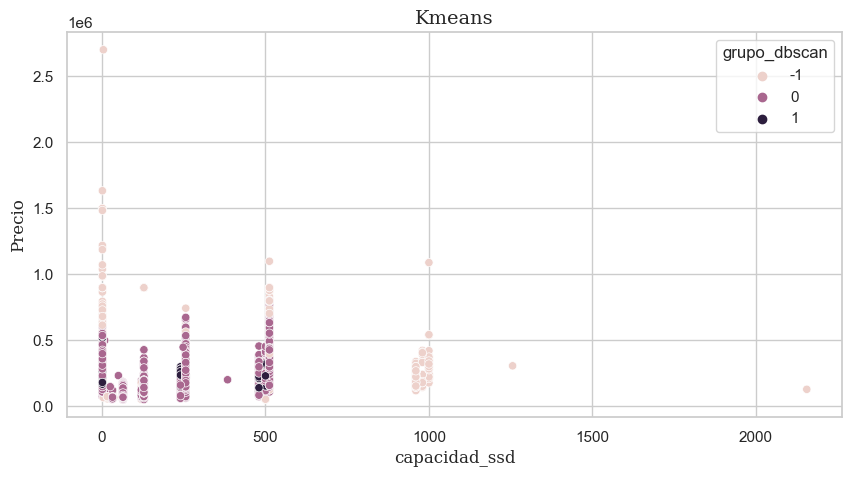

In [102]:
#sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,4))

plt.figure(figsize=(10,5))
ax = sns.scatterplot(x="capacidad_ssd", y = "price", hue = "grupo_dbscan", data=df_n)
ax.set_title("Kmeans", size=14, family='serif') 
plt.xlabel("capacidad_ssd", size=12, family='serif')  
plt.ylabel("Precio", size=12, family='serif')  
plt.show()

In [103]:

df_n["grupo_dbscan"] = df_n["grupo_dbscan"].astype(str)


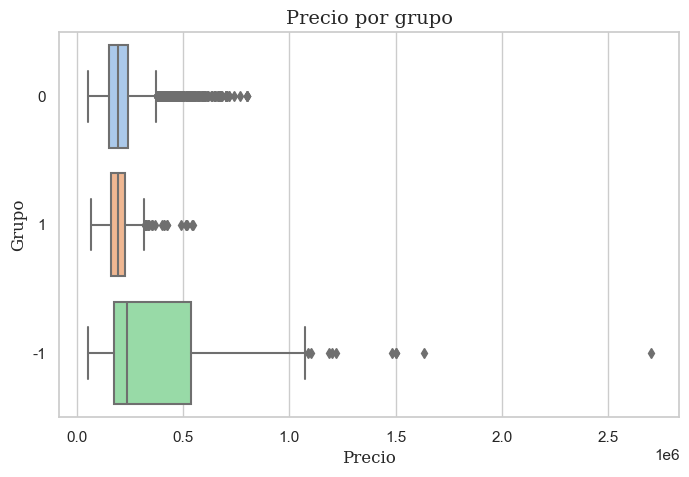

In [104]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="price", data=df_n, y = "grupo_dbscan")
ax.set_title("Precio por grupo", size=14, family='serif') 
plt.xlabel('Precio', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

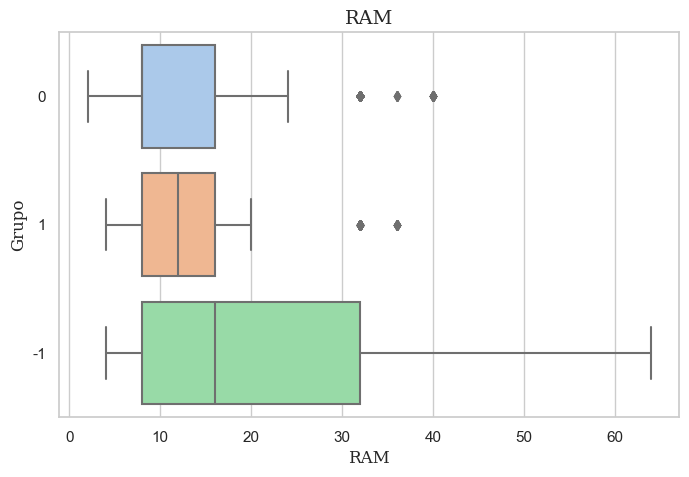

In [105]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ram", data=df_n, y = "grupo_dbscan")
ax.set_title("RAM", size=14, family='serif') 
plt.xlabel('RAM', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

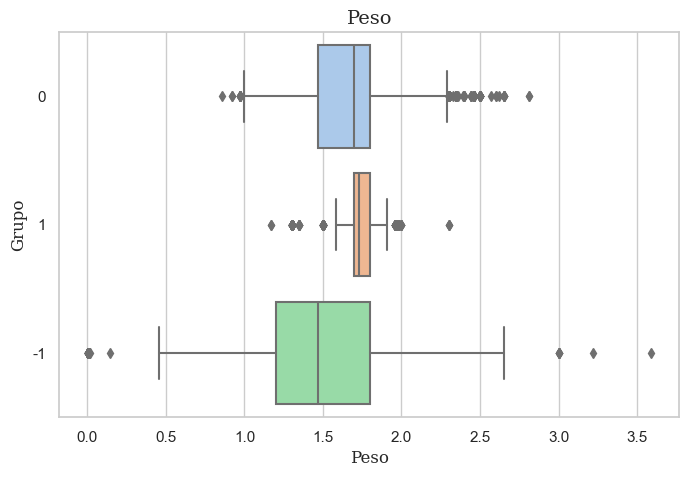

In [106]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="valor_peso", data=df_n, y = "grupo_dbscan")
ax.set_title("Peso", size=14, family='serif') 
plt.xlabel('Peso', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

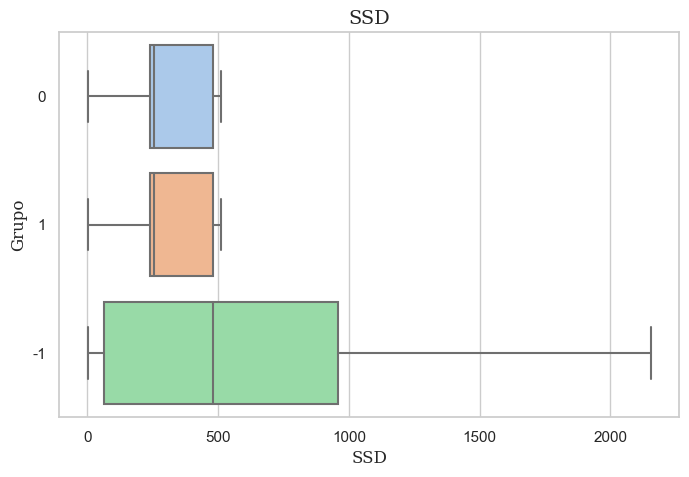

In [107]:
sns.set_theme(style="whitegrid", palette="pastel")

plt.figure(figsize=(8,5))

ax = sns.boxplot(x="capacidad_ssd", data=df_n, y = "grupo_dbscan")
ax.set_title("SSD", size=14, family='serif') 
plt.xlabel('SSD', size=12, family='serif')  
plt.ylabel('Grupo', size=12, family='serif')  
plt.show()

## Gower 

In [108]:
import gower
df_gower = gower.gower_matrix(df)

In [109]:
df_gower = pd.DataFrame(df_gower)

In [110]:
df_gower.head()

0       1       2       3       4       5       6       7       8     \
0 0.00000 0.34999 0.26846 0.30303 0.34221 0.32152 0.45949 0.26965 0.22880   
1 0.34999 0.00000 0.35419 0.22088 0.37242 0.24102 0.51401 0.35877 0.34350   
2 0.26846 0.35419 0.00000 0.26399 0.38989 0.32210 0.45326 0.17999 0.27156   
3 0.30303 0.22088 0.26399 0.00000 0.33016 0.20278 0.47117 0.31181 0.29847   
4 0.34221 0.37242 0.38989 0.33016 0.00000 0.30932 0.57540 0.39447 0.39037   

     9       10      11      12      13      14      15      16      17    \
0 0.36951 0.27675 0.28579 0.27400 0.29639 0.35328 0.33079 0.27808 0.28681   
1 0.43760 0.35696 0.24051 0.29564 0.22996 0.40645 0.38774 0.35993 0.19362   
2 0.23527 0.14008 0.28999 0.27820 0.30059 0.34851 0.23761 0.18489 0.29101   
3 0.34715 0.27064 0.19704 0.25078 0.18528 0.32260 0.34247 0.31709 0.19470   
4 0.31781 0.38122 0.30716 0.34025 0.31897 0.34409 0.44913 0.39321 0.30937   

     18      19      20      21      22      23      24      25      26    \
0 0.27543 0.32512 0.32541 0.28016 0.33119 0.27053 0.27027 0.19240 0.27533   
1 0.35995 0.38690 0.38477 0.35356 0.39297 0.21921 0.38408 0.35325 0.29445   
2 0.22459 0.31889 0.23319 0.19036 0.32496 0.31821 0.32133 0.23062 0.27939   
3 0.27096 0.34406 0.33781 0.26312 0.35013 0.18521 0.33715 0.30628 0.25071   
4 0.39564 0.43861 0.44616 0.40333 0.44710 0.29371 0.38746 0.35663 0.34078   

     27      28      29      30      31      32      33      34      35    \
0 0.26836 0.18803 0.26639 0.22410 0.26925 0.26327 0.29093 0.30641 0.32158   
1 0.38824 0.35130 0.39407 0.35355 0.34943 0.31437 0.23298 0.21797 0.40343   
2 0.31604 0.22867 0.31275 0.17480 0.26943 0.21397 0.25189 0.31061 0.31450   
3 0.34329 0.30434 0.34888 0.26311 0.30305 0.23053 0.14254 0.18077 0.36059   
4 0.37820 0.35469 0.42750 0.38925 0.38285 0.42678 0.31806 0.33036 0.43913   

     36      37      38      39      40      41      42      43      44    \
0 0.29040 0.32374 0.28667 0.18720 0.22991 0.48910 0.48166 0.35160 0.32104   
1 0.32420 0.34310 0.27580 0.29972 0.38757 0.41376 0.40633 0.35447 0.44083   
2 0.33808 0.32794 0.28725 0.27219 0.31930 0.48626 0.47919 0.31224 0.31838   
3 0.28161 0.30052 0.23295 0.30035 0.34060 0.45603 0.44859 0.27062 0.39387   
4 0.39767 0.37755 0.27656 0.39006 0.39096 0.61228 0.60484 0.46602 0.44422   

     45      46      47      48      49      50      51      52      53    \
0 0.27388 0.31285 0.30512 0.32158 0.26538 0.44718 0.39564 0.27710 0.35791   
1 0.25003 0.44381 0.18314 0.39063 0.30285 0.32231 0.47941 0.39205 0.36226   
2 0.27808 0.35824 0.35377 0.31536 0.22647 0.39747 0.35530 0.27087 0.35168   
3 0.20718 0.39685 0.26930 0.34778 0.21247 0.41096 0.38953 0.30330 0.32602   
4 0.29689 0.34908 0.42513 0.43507 0.33854 0.56430 0.42589 0.43891 0.47139   

     54      55      56      57      58      59      60      61      62    \
0 0.32551 0.33196 0.36014 0.23354 0.26860 0.44603 0.27624 0.32375 0.27357   
1 0.39576 0.37838 0.36667 0.34457 0.35269 0.53031 0.30180 0.34311 0.34988   
2 0.23232 0.32945 0.35391 0.18407 0.13194 0.43981 0.22717 0.32795 0.22752   
3 0.30822 0.33141 0.32825 0.25412 0.26249 0.48504 0.30243 0.30053 0.30292   
4 0.44263 0.45514 0.47823 0.39143 0.38839 0.56601 0.39215 0.37756 0.39675   

     63      64      65      66      67      68      69      70      71    \
0 0.32649 0.41113 0.27726 0.35355 0.33089 0.35304 0.32551 0.28222 0.43376   
1 0.39553 0.49546 0.39245 0.36102 0.40187 0.18322 0.39989 0.24447 0.44082   
2 0.27678 0.36166 0.31451 0.34829 0.28118 0.35272 0.28088 0.28642 0.39389   
3 0.30921 0.40502 0.34693 0.32066 0.31361 0.27308 0.30944 0.20100 0.35754   
4 0.44240 0.53115 0.39583 0.47430 0.44874 0.42521 0.44675 0.30358 0.46401   

     72      73      74      75      76      77      78      79      80    \
0 0.45223 0.27670 0.31454 0.31430 0.31809 0.31824 0.30628 0.28829 0.31173   
1 0.52127 0.38797 0.42675 0.38867 0.32571 0.39455 0.21783 0.35781 0.22033   
2 0.44600 0.31865 0.36416 0.27132 0.22515 0.27192 0.31047 0.23858 0.31

In [111]:
df_gower.shape

(6981, 6981)

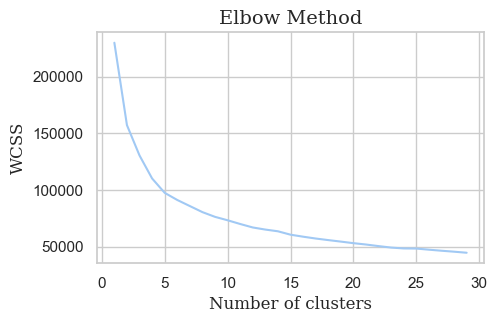

In [113]:
wcss = []
limit = 30
for i in range(1, limit):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=100, n_init=10, random_state=17)
    kmeans.fit(df_gower)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, limit), wcss)
plt.title('Elbow Method', size=14, family='serif')
plt.xlabel('Number of clusters', size=12, family='serif')  
plt.ylabel('WCSS', size=12, family='serif')  
plt.show()